# Exercise 1: Statistics and matrices

In this exercise, we will perform some fundamental statistical analyses on an environmental dataset. We'll calculate descriptive statistics, explore the relationships between variables using a correlation matrix, and visualize the distribution of the data.

## Setup: Preparing Your Environment

Before we begin, we need to import the necessary Python libraries and upload our dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### **IMPORTANT**: Upload the Dataset

1. Find the `toolo.csv` file provided for this exercise.
2. On the left side of this Colab notebook, click the **Files** icon (it looks like a folder 📁).
3. Click the **"Upload to session storage"** button (looks like a page with an up arrow) and select the `toolo.csv` file.
4. Wait for the upload to complete. You should see `toolo.csv` appear in the file list.
5. Once the file is uploaded, you can proceed to the next step.

---
## Data Exploration

Every investigation starts with getting to know your data. The goal of this first part, known as **Exploratory Data Analysis (EDA)**, is to explore the data without a clear idea of what you're looking for, helping you generate initial hypotheses.

First, let's load the `toolo.csv` file you just uploaded. We will also remove data from leap years to ensure each year has 365 days, which simplifies our analysis of yearly patterns.

To prepare for your exercise tasks, select your data (your own or supplied in the course material) and find out the meaning of the variables. Create or find a descrip-tion similar to the air quality data below.  Furthermore, select the variables to be used in the exercise tasks. Select only continuous numerical variables. Note that e.g. date cannot be used in the following tasks. In the example below, the variables to be used in this exercise have been bolded.

| Variables | Description                                      |
| --------- | ------------------------------------------------ |
| Date      | Day of the measurements                          |
| Julianday | Number of the day from the beginning of the year |
| Time      | Hour of the day                                  |
| NO2       | Nitrogen dioxide concentration                   |
| O3        | Ozone concentration                              |
| PM10      | Particulate matter mass under 10 umeters         |
| CO        | Carbon monoxide concentration                    |
| Temp      | Temperature                                      |
| Hum  | Humidity                                         |
| WS | Windspeed                                        |

In [2]:
# Open CSV file
df_data = pd.read_csv("toolo.csv", index_col=0)

# Delete the last day of the year if the year is a leap year
is_leap_day = (df_data['Julianday'] == 366)
df_data = df_data[~is_leap_day]

# Display the first few rows to confirm it loaded correctly
df_data.head()

,Julianday,Time,NO2,O3,PM10,CO,Temp,Hum,WS
Date,,,,,,,,,
19960101,1,1,77.0,11.0,23.0000,1.5,-5.54999,97.0,1.3
19960101,1,2,71.0,10.0,23.0000,1.6,-5.54999,97.0,1.3
19960101,1,3,62.0,8.0,17.3333,0.8,-6.04999,97.0,1.3
19960101,1,4,60.5,8.0,17.3333,0.7,-6.54999,97.0,1.3
19960101,1,5,59.0,10.0,17.3333,0.7,-6.94999,97.0,1.3


### First Look at the Data

**Instructions:**
1.  In the cell below, use the `.describe()` method on the `no2` and `o3` columns of your DataFrame.
2.  Look at the mean, standard deviation, min, and max values.

**Discussion Questions:**
* What are the average concentrations for $NO_2$ and $O_3$?
* Which pollutant shows more variability (higher standard deviation)?
* Are there any potentially erroneous values? Discuss what these might mean.

In [3]:
# Your code here to describe the 'no2' and 'o3' columns
df_data[['NO2', 'O3']].describe()

,NO2,O3
count,35040.000000,35040.000000
mean,38.442875,37.084922
std,23.191684,21.985849
min,-3.000000,0.000000
25%,20.000000,19.000000
50%,36.000000,35.000000
75%,53.000000,53.000000
max,309.000000,142.000000


---
## Task 1: Descriptive Statistics

Calculate the mean, standard deviation, minimum, and maximum values for the selected numerical variables.

In [4]:
# Select the numerical variables (excluding 'Date' and 'Julian day')
numerical_vars = ['NO2', 'O3', 'PM10', 'CO', 'Temp', 'Hum', 'WS']

# Calculate and display descriptive statistics for the selected variables
display(df_data[numerical_vars].describe().loc[['mean', 'std', 'min', 'max']])

,NO2,O3,PM10,CO,Temp,Hum,WS
mean,38.442875,37.084922,24.473338,0.754423,5.300942,77.422146,4.254828
std,23.191684,21.985849,21.971638,0.584595,9.569414,19.014393,2.072066
min,-3.000000,0.000000,-9.000000,-1.000000,-29.850000,19.000000,1.000000
max,309.000000,142.000000,636.000000,14.100000,30.450001,100.000000,14.680000


### Analysis Questions:

1.  **What does this information reveal about the measurements?**
   
2.  **Are there values that are impossible or possibly erroneous?**


---
## Task 2: Cross-Correlation Matrix
Using the variables, calculate the cross-correlation matrix between the air quality and weather variables. Analyze the dependencies between the variables.


In [5]:
# Select the numerical variables (excluding 'Date' and 'Julian day')
numerical_vars = ['NO2', 'O3', 'PM10', 'CO', 'Temp', 'Hum', 'WS']

# Calculate the cross-correlation matrix
correlation_matrix = df_data[numerical_vars].corr()

# Display the correlation matrix
display(correlation_matrix)

,NO2,O3,PM10,CO,Temp,Hum,WS
NO2,1.000000,-0.516201,0.557645,0.714170,-0.040196,-0.196053,-0.369513
O3,-0.516201,1.000000,-0.153734,-0.527889,0.268362,-0.308725,0.301711
PM10,0.557645,-0.153734,1.000000,0.433038,-0.030061,-0.200234,-0.169747
CO,0.714170,-0.527889,0.433038,1.000000,-0.114119,0.022315,-0.241993
Temp,-0.040196,0.268362,-0.030061,-0.114119,1.000000,-0.405071,-0.012124
Hum,-0.196053,-0.308725,-0.200234,0.022315,-0.405071,1.000000,-0.052521
WS,-0.369513,0.301711,-0.169747,-0.241993,-0.012124,-0.052521,1.000000


We can visualize the correlation matrix as a heatmap for better understanding.


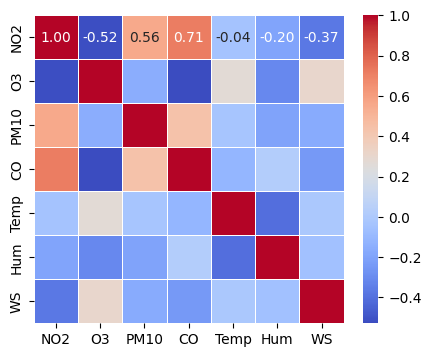

In [13]:
import seaborn as sns

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
#plt.title('Cross-Correlation Matrix of Air Quality and Weather Variables')
plt.savefig('../../LaTex/plots/e1_corr.pdf', bbox_inches='tight')
plt.show()

### Analysis Questions:

1.  **Which ones are strongly correlated?**


2.  **Are the strong correlations positive or negative?**


3.  **What does it mean if two variables are negatively correlated?**


---
## Task 3: Variable Distributions
Describe the distributions of the selected variables using histograms.

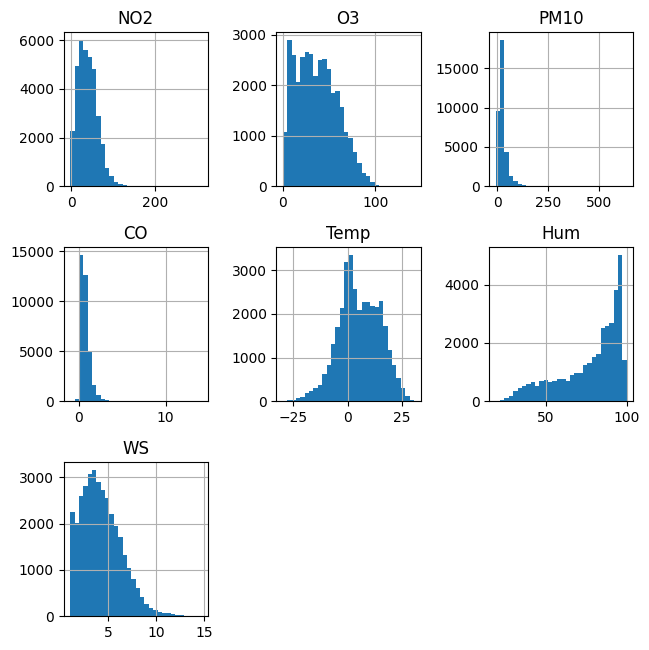

In [ ]:
# Select the numerical variables (excluding 'Date' and 'Julian day')
numerical_vars = ['NO2', 'O3', 'PM10', 'CO', 'Temp', 'Hum', 'WS']

# Create histograms for each numerical variable
df_data[numerical_vars].hist(figsize=(6.6,6.6), bins=30)
plt.tight_layout()
plt.savefig('../../LaTex/plots/e1_hist.pdf', bbox_inches='tight')
plt.show()

In [39]:
df_data[numerical_vars].max()

NO2     309.000000
O3      142.000000
PM10    636.000000
CO       14.100000
Temp     30.450001
Hum     100.000000
WS       14.680000
dtype: float64

### Analysis Questions:

1.  **Which of them look like normally distributed?**


2.  **What kind of deviations from the normal distribution can you detect, like skewness or outliers?**
